In [1]:
import webbpsf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nrc = webbpsf.NIRCam()

In [3]:
psf = nrc.calc_psf()        # default spectrum: 5700 K sunlike star

In [23]:
h1 = psf[1].header
h2 = psf[2].header
for k in set(h1) & set(h2):
    if h1[k] != h2[k]:
        print(k, h1.comments[k])

EXTNAME This extension is oversampled.
HISTORY 
PIXELSCL Scale in arcsec/pix (after oversampling)
NAXIS2 
NAXIS1 
OVERSAMP These data are rebinned to detector pixels


In [8]:
for p in psf:
    print(p.header['FOV'], p.header['PIXELSCL'])

4.996136 0.0078064625
4.996136 0.03122585
4.996136 0.0078064625
4.996136 0.03122585


In [40]:
psf_choosen = psf[0]

In [28]:
import galsim

In [42]:
pixel_size

0.0078064625

In [43]:
pixel_size = psf_choosen.header['PIXELSCL']
image = galsim.Image(psf_choosen.data)
galsim_psf = galsim.InterpolatedImage(image, scale=pixel_size)

In [44]:
convolve = galsim.Convolve([galsim.DeltaFunction(flux=10), galsim_psf])

In [45]:
new_image = convolve.drawImage(nx=40, ny=40, scale=0.031)

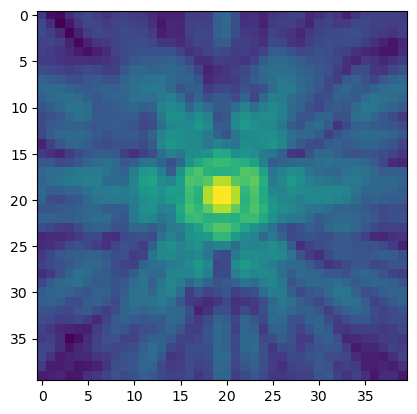

In [47]:
plt.imshow(np.log(new_image.array))

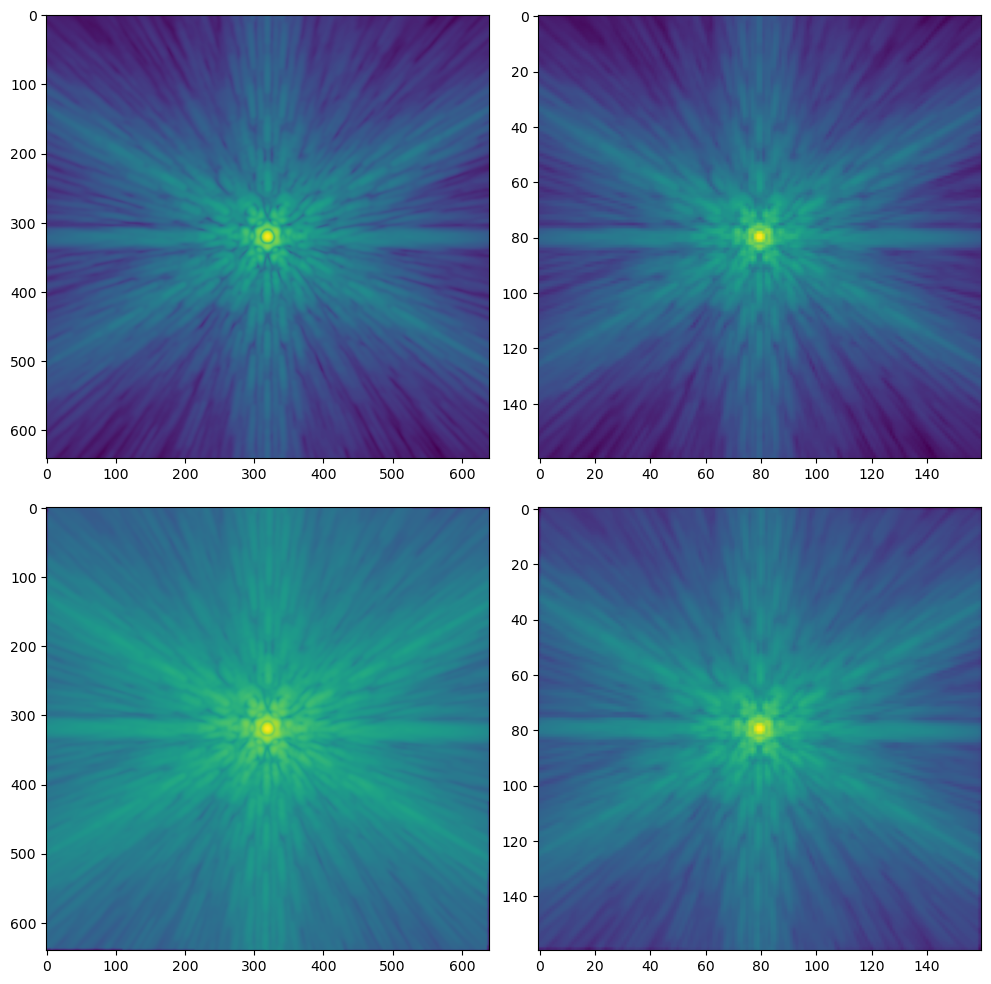

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0,0].imshow(np.log(psf[0].data))
axes[0,1].imshow(np.log(psf[1].data))
axes[1,0].imshow(np.log(psf[2].data))
axes[1,1].imshow(np.log(psf[3].data))

plt.tight_layout()